# Setup

In [167]:
import os
import numpy as np
import matplotlib.pyplot as plt

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Curse of dimensionality 
Many ML problem involves millions of features that makes training extremely slow and also makes harder to find a good solution. This problem is often referred to as the curse of dimensionality.

## Main Approaches for dimensionality reduction

### Projection methods

Build 3D dataset

In [168]:
np.random.seed(4)
m=60
w1,w2=0.1,0.3
noise=0.1

angles = np.random.rand(m) * 3 * np.pi / 2-0.5
x = np.empty((m,3))
x[:,0] = np.cos(angles) + np.sin(angles)/2+noise * np.random.randn(m)/2
x[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
x[:, 2] = x[:, 0] * w1 + x[:, 1] * w2 + noise * np.random.randn(m)

# Principal Component Analysis (PCA)
First, it identifies hyperplane that lies closest to the data, and then it projects the data onto it.



Saving figure pca_best_projection


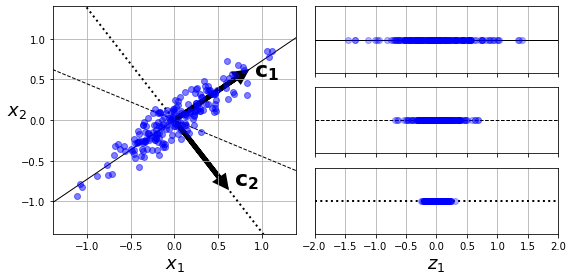

In [169]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
x = np.random.randn(m, 2) / 10
x = x.dot(np.array([[stretch, 0],[0, 1]])) # stretch
x = x.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

x_proj1 = x.dot(u1.reshape(-1, 1))
x_proj2 = x.dot(u2.reshape(-1, 1))
x_proj3 = x.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(x[:, 0], x[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(x_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(x_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(x_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection")
plt.show()


## PCA using SVD decomposition
svd() returns U, s and $V^T$

$V = \begin{pmatrix} | & | && | \\ c_1 & c_2 &...& c_3 \\ | & | && |\end{pmatrix}
$

In [170]:
x_centered = x - x.mean(axis=0)
U,s,Vt = np.linalg.svd(x_centered)
c1 = Vt.T[:,0]
c2 = Vt.T[:,1]

In [171]:
m,n = x.shape

S = np.zeros(x_centered.shape)
S[:n,:n] = np.diag(s)

In [172]:
np.allclose(x_centered, U.dot(S).dot(Vt))

True

In [173]:
w2 = Vt.T[:, :2]
x2d = x_centered.dot(w2)

In [174]:
x2d_using_svd = x2d

## PCA using Scikit-Learn

In [175]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x2d = pca.fit_transform(x)

In [176]:
x2d[:5]

array([[-0.89608814, -0.02615763],
       [-0.04536034,  0.18594886],
       [ 0.13835917,  0.03116662],
       [ 0.04163158,  0.06043718],
       [ 0.02185837,  0.04587267]])

In [177]:
x2d_using_svd[:5]

array([[-0.89608814,  0.02615763],
       [-0.04536034, -0.18594886],
       [ 0.13835917, -0.03116662],
       [ 0.04163158, -0.06043718],
       [ 0.02185837, -0.04587267]])

In the above two examples, PCA using scikit-learn gives the same projection as the one given by the SVD approach, except both axes are flipped.

In [178]:
np.allclose(x2d, -x2d_using_svd)

False

Recovering the 3D points projected on the plane (PCA 2D subspace)

In [179]:
x3d_inv = pca.inverse_transform(x2d)

There are some loss of information during the projection step, so the recovered 3D points are not exactly equalto the original 3D points.

In [180]:
np.allclose(x3d_inv,x)

True

Computing the reconstruction error

In [181]:
np.mean(np.sum(np.square(x3d_inv - x), axis=1))

4.008173601063767e-32

The inverse transform in the SVD approach looks like:


In [182]:
x3d_inv_using_svd = x2d_using_svd.dot(Vt[:2,:])

The reconstructions from both methods are not identical because Scikit-Learn's PCA class automatically take care of reversing the mean centering, but if we subtract the mean, we get the same reconstruction.

In [183]:
np.allclose(x3d_inv_using_svd, x3d_inv-pca.mean_)

True

PCA object gives access to the principal components that it computed:

In [184]:
pca.components_

array([[-0.79644131, -0.60471583],
       [ 0.60471583, -0.79644131]])

Comparing the first two principal components computed using SVD method

In [185]:
Vt[:2]

array([[-0.79644131, -0.60471583],
       [-0.60471583,  0.79644131]])

Here, the axis are flipped.

### PCA explained variance ratio

In [186]:
pca.explained_variance_ratio_

array([0.95369864, 0.04630136])

First dimension explains 84.2% of the variance, ehile the second explains 14.6%.

By projecting down to 2D, we lost about 1.1% of the variance.

In [187]:
1 - pca.explained_variance_ratio_.sum()

0.0

Computing explained variance ratio using SVD approach (s is the diagonal of the matrix S).

In [188]:
np.square(s) / np.square(s).sum()

array([0.95369864, 0.04630136])

In [189]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self,xs,ys,zs,*args,**kwargs):
        FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
        self._verts3d = xs,ys,zs
        
    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, 
                                           zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

expressing the plane as a function of x and y

In [190]:
axes = [-1.8, 1.8, -1.3, 1.3, -1.0, 1.0]

x1s = np.linspace(axes[0], axes[1], 10)
x2s = np.linspace(axes[2], axes[3], 10)
x1,x2 = np.meshgrid(x1s,x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2] * x1 + R[1,2] * x2 / (1-R[2,2]))

IndexError: index 2 is out of bounds for axis 1 with size 2

Plotting 3D dataset, plane and projections on that plane.

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6, 3.8))
ax = fig.add_subplot(111, projection='3d')

x3d_above = x[x[:, 2] > x3d_inv[:, 2]]
x3d_below = x[x[:, 2] <= x3d_inv[:, 2]]

ax.plot(x3d_below[:, 0], x3d_below[:, 1], x3d_below[:, 2], 
        "bo", alpha=0.5)

ax.plot_surface(x1, x2, z, alpha=0.2, color="k")
np.linalg.norm(C, axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], 
                      mutation_scale=15, lw=1, arrowstyle="-|>", 
                      color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], 
                      mutation_scale=15, lw=1, arrowstyle="-|>", 
                      color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if x[i, 2] > x3d_inv[i, 2]:
        ax.plot([x[i][0], x3d_inv[i][0]], [x[i][1], x3d_inv[i][1]], 
                [x[i][2], x3d_inv[i][2]], "k-")
    else:
        ax.plot([x[i][0], x3d_inv[i][0]], [x[i][1],x3d_inv[i][1]], 
                [x[i][2], x3d_inv[i][2]], "k-", color="#505050")
    
ax.plot(x3d_inv[:, 0], x3d_inv[:, 1], x3d_inv[:, 2], "k+")
ax.plot(x3d_inv[:, 0], x3d_inv[:, 1], x3d_inv[:, 2], "k.")
ax.plot(x3d_above[:, 0], x3d_above[:, 1], x3d_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("dataset_3d_plot")
plt.show()

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(x2d[:, 0], x2d[:, 1], "k+")
ax.plot(x2d[:, 0], x2d[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True,
         head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

## Mainfold learning

Swiss roll

In [ ]:
from sklearn.datasets import make_swiss_roll
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [ ]:
axes = [-11.5, 14, -2, 23, -12, 15]

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=t, cmap=plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

In [ ]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(x[:, 0], x[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, x[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

In [ ]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = x[:, 0] > 5
x_pos = x[positive_class]
x_neg = x[~positive_class]
ax.view_init(10, -70)
ax.plot(x_neg[:, 0], x_neg[:, 1], x_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(x_pos[:, 0], x_pos[:, 1], x_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], x[positive_class, 1], "gs")
plt.plot(t[~positive_class], x[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > x[:, 1]
x_pos = x[positive_class]
x_neg = x[~positive_class]
ax.view_init(10, -70)
ax.plot(x_neg[:, 0], x_neg[:, 1], x_neg[:, 2], "y^")
ax.plot(x_pos[:, 0], x_pos[:, 1], x_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], x[positive_class, 1], "gs")
plt.plot(t[~positive_class], x[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot4")
plt.show()

## MNIST compression

In [ ]:
import urllib.request
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, as_frame=False)
    mnist.target = mnist.target.astype(np.int64)
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')

In [ ]:
from sklearn.model_selection import train_test_split

x = mnist["data"]
y = mnist["target"]

x_train, x_test, y_train, y_test = train_test_split(x,y)

In [ ]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [ ]:
d

In [ ]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train)

In [ ]:
pca.n_components_

In [ ]:
np.sum(pca.explained_variance_ratio_)

In [ ]:
pca = PCA(n_components = 154)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [ ]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

In [ ]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [ ]:
x_reduced_pca = x_reduced

## Incremental PCA

In [ ]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train, n_batches):
    print(".",end="") 
    inc_pca.partial_fit(x_batch)

x_reduced = inc_pca.transform(x_train)

In [ ]:
x_recovered_inc_pca = inc_pca.inverse_transform(x_reduced)